In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [24]:
TB=0
TE=3389
INPUT_SIZE=14
OUTPUT_SIZE=1
BATCH_SIZE=1
TIME_STEPS=1
CELL_SIZE=14
HIDD=100

In [25]:
f=open('test_1.csv') 
df=pd.read_csv(f)     
data=df.iloc[:,2:17].values
print(data)

[[ 47.18   47.02   47.    ...,  33.712   1.13   47.58 ]
 [ 47.35   47.35   47.3   ...,  28.89   19.774  47.55 ]
 [ 47.5    47.55   47.25  ...,  26.989  31.073  47.3  ]
 ..., 
 [ 82.05   82.7    81.95  ...,  40.507  53.571  82.6  ]
 [ 82.6    81.6    81.55  ...,  36.418   2.857  81.55 ]
 [ 81.55   80.95   80.75  ...,  31.426   7.843  81.05 ]]


In [26]:
def get_train_data(train_begin=TB,train_end=TE):
    global train_mean, train_std
    data_train=data[train_begin:train_end]
    train_mean=np.mean(data_train,axis=0)
    train_std=np.std(data_train,axis=0)
    normalized_train_data=(data_train-train_mean)/train_std
    train_x = normalized_train_data[:,:14]
    train_y = normalized_train_data[:,14,np.newaxis]
    return train_x[:, np.newaxis], train_y[:,:]
train_x, train_y=get_train_data()

In [27]:
def get_test_data(test_begin=TE):
    global test_mean, test_std
    data_test=data[test_begin:]
    test_mean=np.mean(data_test,axis=0)
    test_std=np.std(data_test,axis=0)
    test_data=(data_test-test_mean)/test_std
    test_x=test_data[:,:14]
    test_y=test_data[:,14,np.newaxis]
    return test_x[:, np.newaxis], test_y[:, np.newaxis]
test_x, test_y=get_test_data()
print(test_x)

[[[  9.28442817e-01   6.97380296e-01   9.93973312e-01   6.76378476e-01
    -6.72208405e-01  -6.67064109e-01  -6.31344345e-02  -3.58919632e-01
    -1.69971395e-01   8.35550960e-01   2.32588796e-01   1.64286321e+00
     1.62908524e+00   1.20290160e+00]]

 [[  5.31248029e-01  -1.77243923e-01   2.01436452e-01   1.78176427e-01
     8.05017271e-01   8.10660158e-01  -1.10348829e+00  -1.50195446e-01
    -2.56218046e+00   2.47563780e+00   7.86058852e-01   1.23824325e+00
     1.55142532e+00   3.79394170e-01]]

 [[ -5.01458420e-01   1.40801247e-01  -2.74085664e-01  -3.20025622e-01
    -4.64611833e-01  -4.67962739e-01   4.59735904e-01   5.74791223e-03
     3.17811768e-02   4.60975051e-01   3.43828770e-01   8.96147019e-01
     1.35952784e+00   2.33503133e-01]]

 [[  5.46142833e-02   3.79335126e-01   2.80690138e-01   1.21090776e-02
    -6.08195168e-01  -6.08701160e-01   3.54246286e-01   1.36100565e-01
    -2.22249501e+00   1.08558756e+00   1.52741698e-01   6.22049625e-01
     1.11934066e+00   1.4073

In [6]:
model = Sequential()

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=CELL_SIZE, return_sequences=True, stateful=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=CELL_SIZE, stateful=True))

model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))
#model.compile(optimizer='rmsprop', loss='mse')
model.compile(optimizer='adam', loss='mse')

C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, units=14, batch_input_shape=(1, 1, 14), stateful=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(1, 1, 14), units=14, stateful=True)`
  import sys


In [7]:
train_history=model.fit(train_x, train_y, batch_size=BATCH_SIZE, epochs=501, verbose=2)

Epoch 1/501
19s - loss: 0.2690
Epoch 2/501
13s - loss: 0.1144
Epoch 3/501
14s - loss: 0.1046
Epoch 4/501
15s - loss: 0.1143
Epoch 5/501
17s - loss: 0.1024
Epoch 6/501
18s - loss: 0.1132
Epoch 7/501
17s - loss: 0.1100
Epoch 8/501
15s - loss: 0.0986
Epoch 9/501
16s - loss: 0.0984
Epoch 10/501
15s - loss: 0.1002
Epoch 11/501
16s - loss: 0.0925
Epoch 12/501
15s - loss: 0.0906
Epoch 13/501
15s - loss: 0.0959
Epoch 14/501
20s - loss: 0.0921
Epoch 15/501
15s - loss: 0.0886
Epoch 16/501
14s - loss: 0.0926
Epoch 17/501
14s - loss: 0.0870
Epoch 18/501
17s - loss: 0.0893
Epoch 19/501
16s - loss: 0.0911
Epoch 20/501
16s - loss: 0.0994
Epoch 21/501
15s - loss: 0.0885
Epoch 22/501
15s - loss: 0.0846
Epoch 23/501
13s - loss: 0.0860
Epoch 24/501
15s - loss: 0.0937
Epoch 25/501
17s - loss: 0.0951
Epoch 26/501
16s - loss: 0.0898
Epoch 27/501
18s - loss: 0.0897
Epoch 28/501
15s - loss: 0.0870
Epoch 29/501
14s - loss: 0.0898
Epoch 30/501
15s - loss: 0.0897
Epoch 31/501
14s - loss: 0.0901
Epoch 32/501
15s 

13s - loss: 0.0933
Epoch 254/501
13s - loss: 0.0740
Epoch 255/501
14s - loss: 0.0866
Epoch 256/501
12s - loss: 0.0844
Epoch 257/501
12s - loss: 0.0916
Epoch 258/501
13s - loss: 0.0898
Epoch 259/501
12s - loss: 0.0826
Epoch 260/501
13s - loss: 0.0839
Epoch 261/501
13s - loss: 0.0877
Epoch 262/501
13s - loss: 0.0817
Epoch 263/501
13s - loss: 0.0940
Epoch 264/501
13s - loss: 0.0863
Epoch 265/501
12s - loss: 0.0927
Epoch 266/501
12s - loss: 0.0825
Epoch 267/501
12s - loss: 0.0860
Epoch 268/501
12s - loss: 0.0814
Epoch 269/501
12s - loss: 0.0845
Epoch 270/501
13s - loss: 0.0778
Epoch 271/501
13s - loss: 0.0904
Epoch 272/501
13s - loss: 0.0911
Epoch 273/501
13s - loss: 0.0842
Epoch 274/501
13s - loss: 0.0848
Epoch 275/501
12s - loss: 0.0867
Epoch 276/501
12s - loss: 0.0876
Epoch 277/501
12s - loss: 0.0795
Epoch 278/501
12s - loss: 0.0790
Epoch 279/501
13s - loss: 0.0819
Epoch 280/501
13s - loss: 0.0823
Epoch 281/501
13s - loss: 0.0792
Epoch 282/501
13s - loss: 0.0764
Epoch 283/501
13s - loss

In [28]:
trainScore = model.evaluate(train_x, train_y, batch_size=BATCH_SIZE, verbose=1)
print(trainScore)

3356/3389 [============================>.] - ETA: 0snan


In [33]:
predict=model.predict(test_x, batch_size=BATCH_SIZE,verbose=1)
print(predict)

44/48 [==========================>...] - ETA: 0s[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]


In [34]:
predict.reshape(-1)
test_predict=np.array(predict)*test_std[3]+test_mean[3]
test_y_=np.array(test_y)*test_std[14]+test_mean[14]

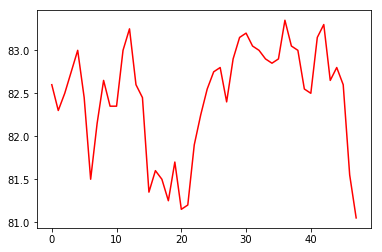

In [35]:
plt.figure()
plt.plot(list(range(len(test_predict))), test_predict, color='b')
plt.plot(list(range(len(test_y_))), test_y_.reshape(-1), color='r')
plt.show()

In [ ]:
np.savetxt('Output_test_predict.csv', test_predict, delimiter=",")
np.savetxt('Output_test_Y.csv', test_y_, delimiter=",")